# Pokemon Dataset Analysis

### Import des modules nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import re

### Récupération du dataset

In [2]:
## Data set from : https://www.kaggle.com/kylekohnen/complete-pokemon-data-set
df = pd.read_csv('pokemon.csv')

In [18]:
# Imprimer les 5 premières lignes (par defaut)
df.head()

name  pokedex_number             abilities        typing  hp  \
0      Bulbasaur               1  Overgrow~Chlorophyll  Grass~Poison  45   
1        Ivysaur               2  Overgrow~Chlorophyll  Grass~Poison  60   
2       Venusaur               3  Overgrow~Chlorophyll  Grass~Poison  80   
3  Venusaur Gmax               3  Overgrow~Chlorophyll  Grass~Poison  80   
4  Venusaur Mega               3             Thick Fat  Grass~Poison  80   

   attack  defense  special_attack  special_defense  speed  ...  \
0      49       49              65               65     45  ...   
1      62       63              80               80     60  ...   
2      82       83             100              100     80  ...   
3      82       83             100              100     80  ...   
4     100      123             122              120     80  ...   

   ground_attack_effectiveness  fly_attack_effectiveness  \
0                          1.0                       2.0   
1                          1.0                       2.0   
2                          1.0                       2.0   
3                          1.0                       2.0   
4                          1.0                       2.0   

  psychic_attack_effectiveness  bug_attack_effectiveness  \
0                          2.0                       1.0   
1                          2.0                       1.0   
2                          2.0                       1.0   
3                          2.0                       1.0   
4                          2.0                       1.0   

   rock_attack_effectiveness  ghost_attack_effectiveness  \
0                        1.0                         1.0   
1                        1.0                         1.0   
2                        1.0                         1.0   
3                        1.0                         1.0   
4                        1.0                         1.0   

   dragon_attack_effectiveness  dark_attack_effectiveness  \
0                          1.0                        1.0   
1                          1.0                        1.0   
2                          1.0                        1.0   
3                          1.0                        1.0   
4                          1.0                        1.0   

   steel_attack_effectiveness  fairy_attack_effectiveness  
0                         1.0                         0.5  
1                         1.0                         0.5  
2                         1.0                         0.5  
3                         1.0                         0.5  
4                         1.0                         0.5  

[5 rows x 49 columns]

In [60]:
# Affiche l'ensemble des lignes
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

name  pokedex_number  \
0                      Bulbasaur               1   
1                        Ivysaur               2   
2                       Venusaur               3   
3                  Venusaur Gmax               3   
4                  Venusaur Mega               3   
5                     Charmander               4   
6                     Charmeleon               5   
7                      Charizard               6   
8                 Charizard Gmax               6   
9               Charizard Mega X               6   
10              Charizard Mega Y               6   
11                      Squirtle               7   
12                     Wartortle               8   
13                     Blastoise               9   
14                Blastoise Gmax               9   
15                Blastoise Mega               9   
16                      Caterpie              10   
17                       Metapod              11   
18                    Butterfree              12   
19               Butterfree Gmax              12   
20                        Weedle              13   
21                        Kakuna              14   
22                      Beedrill              15   
23                 Beedrill Mega              15   
24                        Pidgey              16   
25                     Pidgeotto              17   
26                       Pidgeot              18   
27                  Pidgeot Mega              18   
28                       Rattata              19   
29                 Rattata Alola              19   
30                      Raticate              20   
31                Raticate Alola              20   
32          Raticate Totem Alola              20   
33                       Spearow              21   
34                        Fearow              22   
35                         Ekans              23   
36                         Arbok              24   
37                       Pikachu              25   
38             Pikachu Alola Cap              25   
39                 Pikachu Belle              25   
40               Pikachu Cosplay              25   
41                  Pikachu Gmax              25   
42             Pikachu Hoenn Cap              25   
43             Pikachu Kalos Cap              25   
44                 Pikachu Libre              25   
45          Pikachu Original Cap              25   
46           Pikachu Partner Cap              25   
47                   Pikachu Phd              25   
48              Pikachu Pop Star              25   
49             Pikachu Rock Star              25   
50            Pikachu Sinnoh Cap              25   
51             Pikachu Unova Cap              25   
52                        Raichu              26   
53                  Raichu Alola              26   
54                     Sandshrew              27   
55               Sandshrew Alola              27   
56                     Sandslash              28   
57               Sandslash Alola              28   
58                     Nidoran F              29   
59                      Nidorina              30   
60                     Nidoqueen              31   
61                     Nidoran M              32   
62                      Nidorino              33   
63                      Nidoking              34   
64                      Clefairy              35   
65                      Clefable              36   
66                        Vulpix              37   
67                  Vulpix Alola              37   
68                     Ninetales              38   
69               Ninetales Alola              38   
70                    Jigglypuff              39   
71                    Wigglytuff              40   
72                         Zubat              41   
73                        Golbat              42   
74                        Oddish              43   
75                         Gloom              44   
76                     V

In [62]:
list(df.columns)

['name',
 'pokedex_number',
 'abilities',
 'typing',
 'hp',
 'attack',
 'defense',
 'special_attack',
 'special_defense',
 'speed',
 'height',
 'weight',
 'genus',
 'gen_introduced',
 'female_rate',
 'genderless',
 'baby_pokemon',
 'legendary',
 'mythical',
 'is_default',
 'forms_switchable',
 'base_experience',
 'capture_rate',
 'egg_groups',
 'egg_cycles',
 'base_happiness',
 'can_evolve',
 'evolves_from',
 'primary_color',
 'shape',
 'number_pokemon_with_typing',
 'normal_attack_effectiveness',
 'fire_attack_effectiveness',
 'water_attack_effectiveness',
 'electric_attack_effectiveness',
 'grass_attack_effectiveness',
 'ice_attack_effectiveness',
 'fighting_attack_effectiveness',
 'poison_attack_effectiveness',
 'ground_attack_effectiveness',
 'fly_attack_effectiveness',
 'psychic_attack_effectiveness',
 'bug_attack_effectiveness',
 'rock_attack_effectiveness',
 'ghost_attack_effectiveness',
 'dragon_attack_effectiveness',
 'dark_attack_effectiveness',
 'steel_attack_effectiveness',

### Création d'un subdataset

In [4]:
# Crée un nouveau dataset avec les différentes colonnes incluses (ne peut s'executer qu'une fois)
df2 = df[['name','typing','hp','attack','defense','special_attack','special_defense','speed','gen_introduced','legendary']]

In [5]:
# Split la colonne typing en deux colonnes type1 et type2
df2[['type1','type2']] = df.typing.str.split("~",expand=True)

# Remplissage de type2 pour les pokemon n'ayant qu'un seul type
df2['type2'].fillna(df2['type1'],inplace=True)

# Suppression de la colonne typing obsolete
# df2 = df2.drop(["typing"],axis=1)

# Rajout de la colonne total_stat = somme des stats
df2['total_stat'] = df[['hp','attack','defense','special_attack','special_defense','speed']].sum(axis=1)
df2.head()

C:\Users\Defaut2\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Defaut2\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\Defaut2\AppData\Local\Temp/ipykernel_16584/1358800637.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

name        typing  hp  attack  defense  special_attack  \
0      Bulbasaur  Grass~Poison  45      49       49              65   
1        Ivysaur  Grass~Poison  60      62       63              80   
2       Venusaur  Grass~Poison  80      82       83             100   
3  Venusaur Gmax  Grass~Poison  80      82       83             100   
4  Venusaur Mega  Grass~Poison  80     100      123             122   

   special_defense  speed  gen_introduced  legendary  type1   type2  \
0               65     45               1      False  Grass  Poison   
1               80     60               1      False  Grass  Poison   
2              100     80               1      False  Grass  Poison   
3              100     80               1      False  Grass  Poison   
4              120     80               1      False  Grass  Poison   

   total_stat  
0         318  
1         405  
2         525  
3         525  
4         625

In [6]:
# Affichage du DF (5 en head / tail par defaut)
df2.columns

Index(['name', 'typing', 'hp', 'attack', 'defense', 'special_attack',
       'special_defense', 'speed', 'gen_introduced', 'legendary', 'type1',
       'type2', 'total_stat'],
      dtype='object')

In [106]:
# Affiche une colonne (il est aussi possible d'appeler avec un "." ie df.name (ne marche que pour une valeur)
df['name']

0        45
1        60
2        80
3        80
4        80
5        39
6        58
7        78
8        78
9        78
10       78
11       44
12       59
13       79
14       79
15       79
16       45
17       50
18       60
19       60
20       40
21       45
22       65
23       65
24       40
25       63
26       83
27       83
28       30
29       30
30       55
31       75
32       75
33       40
34       65
35       35
36       60
37       35
38       35
39       35
40       35
41       35
42       35
43       35
44       35
45       35
46       35
47       35
48       35
49       35
50       35
51       35
52       60
53       60
54       50
55       50
56       75
57       75
58       55
59       70
60       90
61       46
62       61
63       81
64       70
65       95
66       38
67       38
68       73
69       73
70      115
71      140
72       40
73       75
74       45
75       60
76       75
77       35
78       60
79       60
80       70
81       10
82       10
83  

In [91]:
# affichage de plusieurs colonnes (attention l'integralite des colonnes sont affichés)
df[['name','hp']]

name   hp
0                      Bulbasaur   45
1                        Ivysaur   60
2                       Venusaur   80
3                  Venusaur Gmax   80
4                  Venusaur Mega   80
5                     Charmander   39
6                     Charmeleon   58
7                      Charizard   78
8                 Charizard Gmax   78
9               Charizard Mega X   78
10              Charizard Mega Y   78
11                      Squirtle   44
12                     Wartortle   59
13                     Blastoise   79
14                Blastoise Gmax   79
15                Blastoise Mega   79
16                      Caterpie   45
17                       Metapod   50
18                    Butterfree   60
19               Butterfree Gmax   60
20                        Weedle   40
21                        Kakuna   45
22                      Beedrill   65
23                 Beedrill Mega   65
24                        Pidgey   40
25                     Pidgeotto   63
26                       Pidgeot   83
27                  Pidgeot Mega   83
28                       Rattata   30
29                 Rattata Alola   30
30                      Raticate   55
31                Raticate Alola   75
32          Raticate Totem Alola   75
33                       Spearow   40
34                        Fearow   65
35                         Ekans   35
36                         Arbok   60
37                       Pikachu   35
38             Pikachu Alola Cap   35
39                 Pikachu Belle   35
40               Pikachu Cosplay   35
41                  Pikachu Gmax   35
42             Pikachu Hoenn Cap   35
43             Pikachu Kalos Cap   35
44                 Pikachu Libre   35
45          Pikachu Original Cap   35
46           Pikachu Partner Cap   35
47                   Pikachu Phd   35
48              Pikachu Pop Star   35
49             Pikachu Rock Star   35
50            Pikachu Sinnoh Cap   35
51             Pikachu Unova Cap   35
52                        Raichu   60
53                  Raichu Alola   60
54                     Sandshrew   50
55               Sandshrew Alola   50
56                     Sandslash   75
57               Sandslash Alola   75
58                     Nidoran F   55
59                      Nidorina   70
60                     Nidoqueen   90
61                     Nidoran M   46
62                      Nidorino   61
63                      Nidoking   81
64                      Clefairy   70
65                      Clefable   95
66                        Vulpix   38
67                  Vulpix Alola   38
68                     Ninetales   73
69               Ninetales Alola   73
70                    Jigglypuff  115
71                    Wigglytuff  140
72                         Zubat   40
73                        Golbat   75
74                        Oddish   45
75                         Gloom   60
76                     Vileplume   75
77                         Paras   35
78                      Parasect   60
79                       Venonat   60
80                      Venomoth   70
81                       Diglett   10
82                 Diglett Alola   10
83                       Dugtrio   35
84                 Dugtrio Alola   35
85                        Meowth   40
86                  Meowth Alola   40
87                  Meowth Galar   50
88                   Meowth Gmax   40
89                       Persian   65
90                 Persian Alola   65
91                       Psyduck   50
92                       Golduck   80
93                        Mankey   40
94                      Primeape   65
95                     Growlithe   55
96                      Arcanine   90
97                       Poliwag   40
98                     Poliwhirl   65
99                     Poliwrath   90
100                         Abra   25
101                      Kadabra   40
102                     Alakazam   55
103                Alakazam Mega   55
104                       Machop   70


In [100]:
# Il est possible d'attribuer plusieurs fonctions aux recherches toutes attachaables à la suite
df[['name','hp']].head()

name  hp
0      Bulbasaur  45
1        Ivysaur  60
2       Venusaur  80
3  Venusaur Gmax  80
4  Venusaur Mega  80

In [88]:
# Vérification des isnull avec sum
df2.isnull().sum()

name               0
hp                 0
attack             0
defense            0
special_attack     0
special_defense    0
speed              0
gen_introduced     0
legendary          0
type1              0
type2              0
total_stat         0
dtype: int64

In [101]:
# Sort les statistiques de base (avec un arrondi grace à round)
round(df2.describe())

hp  attack  defense  special_attack  special_defense   speed  \
count  1118.0  1118.0   1118.0          1118.0           1118.0  1118.0   
mean     70.0    81.0     75.0            73.0             73.0    69.0   
std      27.0    32.0     31.0            32.0             28.0    30.0   
min       1.0     5.0      5.0            10.0             20.0     5.0   
25%      50.0    55.0     50.0            50.0             50.0    45.0   
50%      68.0    78.0     70.0            65.0             70.0    67.0   
75%      81.0   100.0     90.0            95.0             90.0    90.0   
max     255.0   190.0    250.0           194.0            250.0   200.0   

       gen_introduced  total_stat  
count          1118.0      1118.0  
mean              4.0       441.0  
std               2.0       120.0  
min               1.0       175.0  
25%               2.0       330.0  
50%               4.0       460.0  
75%               6.0       515.0  
max               8.0      1125.0

In [112]:
# Comptage des differentes valeurs d'une colonne via la fonction value_counts (nombre de legendaires)
df2['legendary'].value_counts()

False    1031
True       87
Name: legendary, dtype: int64

In [22]:
# Comptage des differentes valeurs d'une colonne via la fonction value_counts (nombre de mythical)
df2['type1'][df2['type1'] == "Fairy"].value_counts()

Fairy    24
Name: type1, dtype: int64

In [127]:
# Classer des valeurs par ordre ascendant ou descendant (True / False)
legendary = (df[['name','legendary']][(df['legendary'] == True)])
legendary.sort_values('name', ascending = True)

name  legendary
209                     Articuno       True
210               Articuno Galar       True
602                        Azelf       True
1115                     Calyrex       True
1116           Calyrex Ice Rider       True
1117        Calyrex Shadow Rider       True
769                     Cobalion       True
975                      Cosmoem       True
974                       Cosmog       True
609                    Cresselia       True
603                       Dialga       True
321                        Entei       True
1103                   Eternatus       True
1104         Eternatus Eternamax       True
607             Giratina Altered       True
608              Giratina Origin       True
1113                   Glastrier       True
486                      Groudon       True
487               Groudon Primal       True
605                      Heatran       True
328                        Ho Oh       True
1105                       Kubfu       True
484                       Kyogre       True
485                Kyogre Primal       True
780                       Kyurem       True
781                 Kyurem Black       True
782                 Kyurem White       True
778           Landorus Incarnate       True
779             Landorus Therian       True
480                       Latias       True
481                  Latias Mega       True
482                       Latios       True
483                  Latios Mega       True
327                        Lugia       True
977                       Lunala       True
601                      Mesprit       True
218                       Mewtwo       True
219                Mewtwo Mega X       True
220                Mewtwo Mega Y       True
213                      Moltres       True
214                Moltres Galar       True
985                     Necrozma       True
986                Necrozma Dawn       True
987                Necrozma Dusk       True
988               Necrozma Ultra       True
604                       Palkia       True
320                       Raikou       True
488                     Rayquaza       True
489                Rayquaza Mega       True
478                       Regice       True
1112                   Regidrago       True
1111                   Regieleki       True
606                    Regigigas       True
477                     Regirock       True
479                    Registeel       True
776                     Reshiram       True
976                     Solgaleo       True
1114                   Spectrier       True
322                      Suicune       True
972                    Tapu Bulu       True
973                    Tapu Fini       True
970                    Tapu Koko       True
971                    Tapu Lele       True
770                    Terrakion       True
774          Thundurus Incarnate       True
775            Thundurus Therian       True
772           Tornadus Incarnate       True
773             Tornadus Therian       True
1106        Urshifu Rapid Strike       True
1107   Urshifu Rapid Strike Gmax       True
1108       Urshifu Single Strike       True
1109  Urshifu Single Strike Gmax       True
600                         Uxie       True
771                     Virizion       True
865                      Xerneas       True
866                      Yveltal       True
1099              Zacian Crowned       True
1100                 Zacian Hero       True
1101           Zamazenta Crowned       True
1102              Zamazenta Hero       True
211                       Zapdos       True
212                 Zapdos Galar       True
777                       Zekrom       True
867                      Zygarde       True
868                   Zygarde 10       True
869                   Zygarde 50       True
870             Zygarde Complete       True

In [116]:
# Indexing d'une série (une seule colonne). De 0 à 9 dans ce cas (10 étant exclus comme caractère exclusif)
df['name'][0:10]

0           Bulbasaur
1             Ivysaur
2            Venusaur
3       Venusaur Gmax
4       Venusaur Mega
5          Charmander
6          Charmeleon
7           Charizard
8      Charizard Gmax
9    Charizard Mega X
Name: name, dtype: object

### Exploration basique de notre jeu de données

In [7]:
# Pokemon ayant le min d'hp
min_poke = df2[(df2['hp'] == df['hp'].min())]
min_poke

name     typing  hp  attack  defense  special_attack  \
376  Shedinja  Bug~Ghost   1      90       45              30   

     special_defense  speed  gen_introduced  legendary type1  type2  \
376               30     40               3      False   Bug  Ghost   

     total_stat  
376         236

In [36]:
# Pokemon ayant le plus de speed
max_poke = df2[(df2['speed'] == df['speed'].max())]
max_poke

name   hp  attack  defense  special_attack  special_defense  \
219  Mewtwo Mega X  106     190      100             154              100   

     speed  gen_introduced  legendary    type1     type2  total_stat  
219    130               1       True  Psychic  Fighting         780

In [58]:
# Pokemon ayant le min d'hp
#df3 = df2[(df2['speed'] == df['speed'].min())]
#df2[df2['attack'] == df2['attack'].max() & df2['type1'] == 'Bug']

# Pokemon insecte ayant le plus d'attaque
(df2[df2['type1'] == 'Fairy']).sort_values(by=['speed'],ascending=True)


name   hp  attack  defense  special_attack  special_defense  \
243            Cleffa   50      25       28              45               55   
245            Togepi   35      20       65              40               65   
825          Spritzee   78      52       60              63               65   
826        Aromatisse  101      72       72              99               89   
282          Snubbull   60      80       50              40               40   
1074          Milcery   45      40       40              50               61   
64           Clefairy   70      45       48              60               65   
246           Togetic   55      40       85              80              105   
809           Flabebe   44      38       39              61               79   
283          Granbull   90     120       75              60               60   
827           Swirlix   62      48       66              59               57   
810           Floette   54      45       47              75               98   
65           Clefable   95      70       73              95               90   
843           Sylveon   95      65       65             110              130   
1075         Alcremie   65      60       75             110              121   
1076    Alcremie Gmax   65      60       75             110              121   
828          Slurpuff   82      80       86              85               75   
812           Florges   78      65       68             112              154   
582          Togekiss   85      50       95             120              115   
811   Floette Eternal   74      65       67             125              128   
865           Xerneas  126     131       95             131               98   
931            Comfey   51      52       90              82              110   
1100      Zacian Hero   92     130      115              80              115   
1099   Zacian Crowned   92     170      115              80              115   

      speed  gen_introduced  legendary  type1   type2  total_stat  
243      15               2      False  Fairy   Fairy         218  
245      20               2      False  Fairy   Fairy         245  
825      23               6      False  Fairy   Fairy         341  
826      29               6      False  Fairy   Fairy         462  
282      30               2      False  Fairy   Fairy         300  
1074     34               8      False  Fairy   Fairy         270  
64       35               1      False  Fairy   Fairy         323  
246      40               2      False  Fairy  Flying         405  
809      42               6      False  Fairy   Fairy         303  
283      45               2      False  Fairy   Fairy         450  
827      49               6      False  Fairy   Fairy         341  
810      52               6      False  Fairy   Fairy         371  
65       60               1      False  Fairy   Fairy         483  
843      60               6      False  Fairy   Fairy         525  
1075     64               8      False  Fairy   Fairy         495  
1076     64               8      False  Fairy   Fairy         495  
828      72               6      False  Fairy   Fairy         480  
812      75               6      False  Fairy   Fairy         552  
582      80               4      False  Fairy  Flying         545  
811      92               6      False  Fairy   Fairy         551  
865      99               6       True  Fairy   Fairy         680  
931     100               7      False  Fairy   Fairy         485  
1100    138               8       True  Fairy   Fairy         670  
1099    148               8       True  Fairy   Steel         720

### Fonction Group By

In [24]:
# Group by les pokemons par types, gens et noms incluant seulement les pokemons de la gens 2 à 4 de type Fée.
df2[['type1','type2','gen_introduced','name']][(df2['gen_introduced'] > 1 ) & (df2['type1'] == 'Fairy')].groupby(['type1','type2','gen_introduced','name']).sum()

Empty DataFrame
Columns: []
Index: [(Fairy, Fairy, 2, Cleffa), (Fairy, Fairy, 2, Granbull), (Fairy, Fairy, 2, Snubbull), (Fairy, Fairy, 2, Togepi), (Fairy, Fairy, 6, Aromatisse), (Fairy, Fairy, 6, Flabebe), (Fairy, Fairy, 6, Floette), (Fairy, Fairy, 6, Floette Eternal), (Fairy, Fairy, 6, Florges), (Fairy, Fairy, 6, Slurpuff), (Fairy, Fairy, 6, Spritzee), (Fairy, Fairy, 6, Swirlix), (Fairy, Fairy, 6, Sylveon), (Fairy, Fairy, 6, Xerneas), (Fairy, Fairy, 7, Comfey), (Fairy, Fairy, 8, Alcremie), (Fairy, Fairy, 8, Alcremie Gmax), (Fairy, Fairy, 8, Milcery), (Fairy, Fairy, 8, Zacian Hero), (Fairy, Flying, 2, Togetic), (Fairy, Flying, 4, Togekiss), (Fairy, Steel, 8, Zacian Crowned)]

In [12]:
obj = df2[['type1','type2','gen_introduced','name']][(df2['gen_introduced'] > 1 ) & (df2['gen_introduced'] < 5 ) & ((df2['type1'] == 'Fairy') | (df2['type2'] == 'Fairy'))].groupby(['type1','type2','gen_introduced','name'])
list(obj.groups.keys())

[('Dragon', 'Fairy', 3, 'Altaria Mega'),
 ('Fairy', 'Fairy', 2, 'Cleffa'),
 ('Fairy', 'Fairy', 2, 'Granbull'),
 ('Fairy', 'Fairy', 2, 'Snubbull'),
 ('Fairy', 'Fairy', 2, 'Togepi'),
 ('Fairy', 'Flying', 2, 'Togetic'),
 ('Fairy', 'Flying', 4, 'Togekiss'),
 ('Normal', 'Fairy', 2, 'Igglybuff'),
 ('Normal', 'Fairy', 3, 'Azurill'),
 ('Psychic', 'Fairy', 3, 'Gardevoir'),
 ('Psychic', 'Fairy', 3, 'Gardevoir Mega'),
 ('Psychic', 'Fairy', 3, 'Kirlia'),
 ('Psychic', 'Fairy', 3, 'Ralts'),
 ('Psychic', 'Fairy', 4, 'Mime Jr'),
 ('Steel', 'Fairy', 3, 'Mawile'),
 ('Steel', 'Fairy', 3, 'Mawile Mega'),
 ('Water', 'Fairy', 2, 'Azumarill'),
 ('Water', 'Fairy', 2, 'Marill')]

In [376]:
df3.reset_index()
df3.set_index('name')
df3.loc[df3['name'] == 'Shuckle']

name  hp  attack  defense  special_attack  special_defense  speed  \
287  Shuckle  20      10      230              10              230      5   

     gen_introduced  legendary type1 type2  total_stat  
287               2      False   Bug  Rock         505

In [299]:
#iloc works on the positions in the index (so it only takes integers).
print(df2.iloc[0])

name               Bulbasaur
hp                        45
attack                    49
defense                   49
special_attack            65
special_defense           65
speed                     45
gen_introduced             1
legendary              False
type1                  Grass
type2                 Poison
total_stat               318
Name: 0, dtype: object


### VIsualisation sur les statistiques des pokemon

<AxesSubplot:xlabel='type1', ylabel='total_stat'>

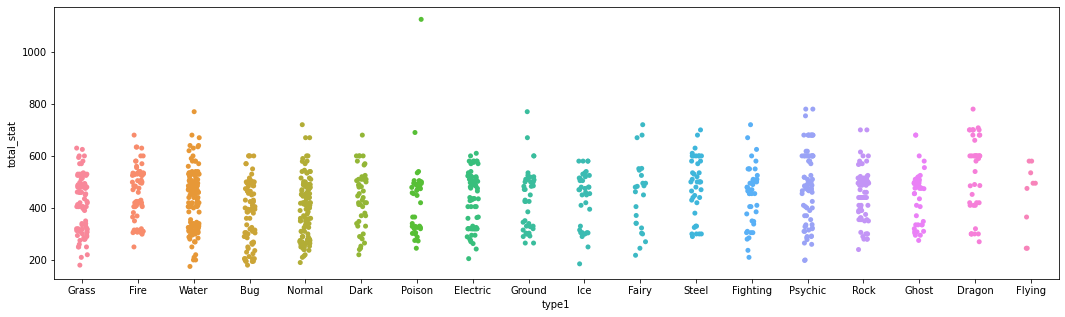

In [13]:
# Total_stat / type1
# Stripplot
fig, ax = plt.subplots(figsize=(18,5))
sns.stripplot(data=df2,x='type1',y='total_stat')

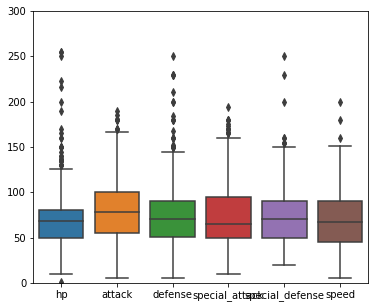

In [19]:
fig, ax = plt.subplots(figsize=(6,5))
# Boxplot
sns.boxplot(data=df2[['hp','attack','defense','special_attack','special_defense','speed']])
plt.ylim(0,300)  #change the scale of y axix
plt.show()

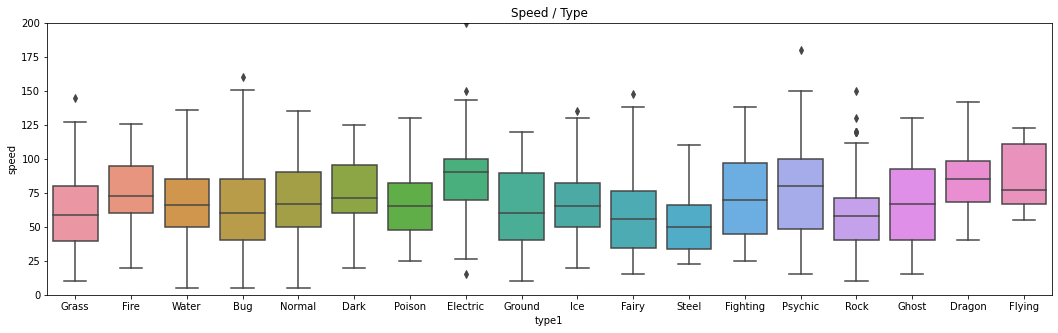

In [35]:
plt.subplots(figsize = (18,5))
plt.title('Speed / Type')
# Boxplot
sns.boxplot(x = "type1", y = "speed",data = df2)
plt.ylim(0,200)
plt.show()

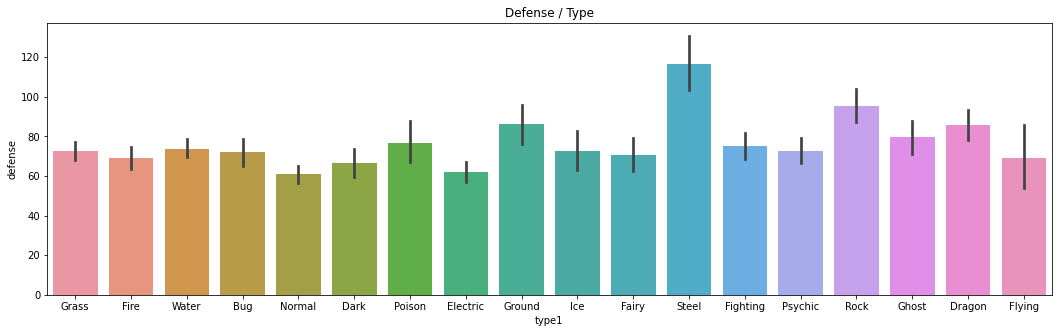

In [232]:
plt.subplots(figsize = (18,5))
plt.title('Defense / Type')
# Barplot
sns.barplot(x = "type1", y = "defense",data = df2)
plt.show()

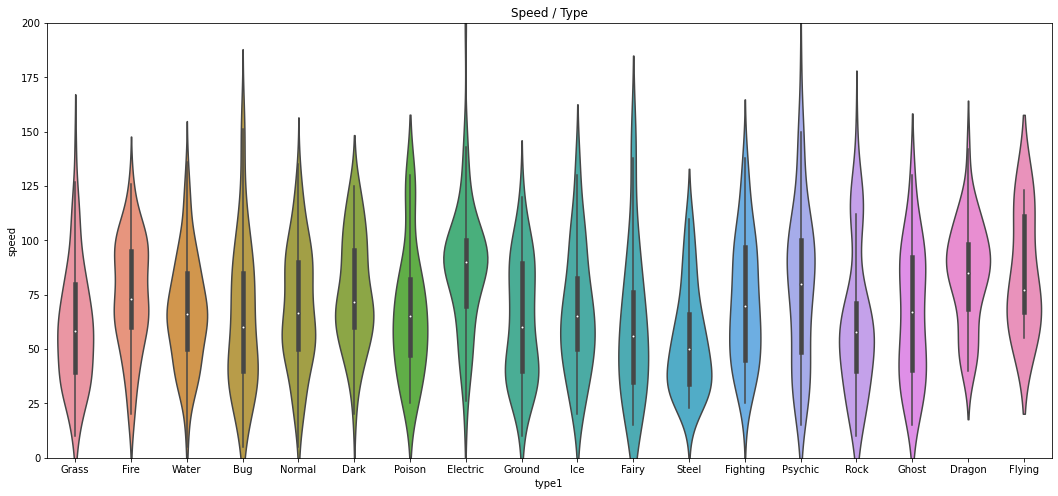

In [233]:
plt.subplots(figsize = (18,8))
plt.title('Speed / Type')
# Violinplot
sns.violinplot(x = "type1", y = "speed",data = df2)
plt.ylim(0,200)
plt.show()

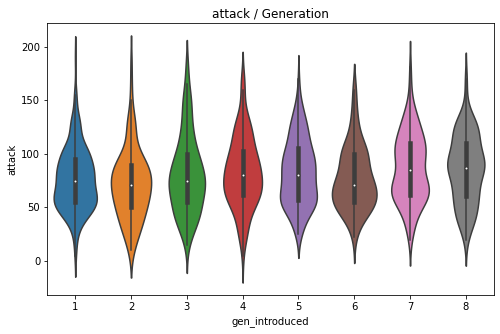

In [417]:
# Distribution de la stat de hp par generation
plt.subplots(figsize = (8,5))
plt.title('attack / Generation')
# Violinplot
sns.violinplot(x = "gen_introduced", y = "attack",data = df2)
plt.show()

C:\Users\Defaut2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Defaut2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Defaut2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

[Text(0.5, 1.0, 'Distribution des statistiques')]

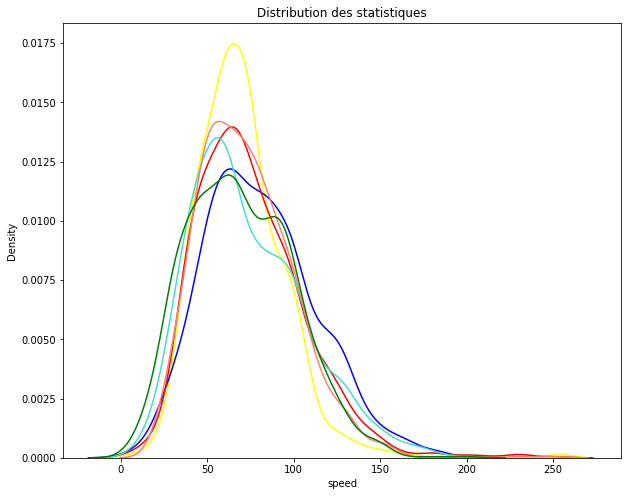

In [14]:
# Distribution de nos statistiques
fig, ax = plt.subplots(figsize=(10,8))
# Distplot
distrib = sns.distplot(df2['hp'],color='yellow',hist=False,ax=ax)
distrib = sns.distplot(df2['attack'],color='blue',hist=False,ax=ax)
distrib = sns.distplot(df2['defense'],color='red',hist=False,ax=ax)
distrib = sns.distplot(df2['special_attack'],color='turquoise',hist=False,ax=ax)
distrib = sns.distplot(df2['special_defense'],color='salmon',hist=False,ax=ax)
distrib = sns.distplot(df2['speed'],color='green',hist=False,ax=ax)
distrib.set(title='Distribution des statistiques')

[Text(0.5, 1.0, 'Correlations entre statistiques pokemon')]

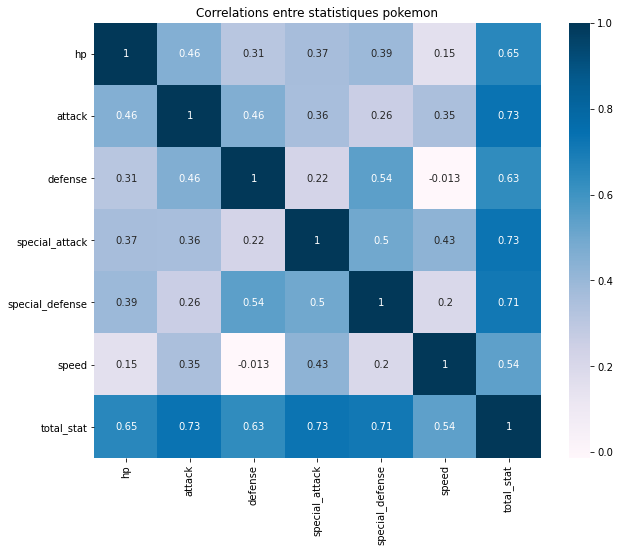

In [431]:
# Recherche de correlations entre stats
dfcor = df2[["hp","attack","defense","special_attack","special_defense","speed","total_stat"]]
fig, ax = plt.subplots(figsize=(10,8))
# Heatmat
"""
Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, 
PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, 
YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, 
gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako,
 mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
"""
corel = sns.heatmap(dfcor.corr(),annot=True,ax=ax,cmap='PuBu')
corel.set(title='Correlations entre statistiques pokemon')

### Visualisation sur les pokemon legendaires

Les legendaires meritent-ils leur titre au niveau stats ?

C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.7% of the points c

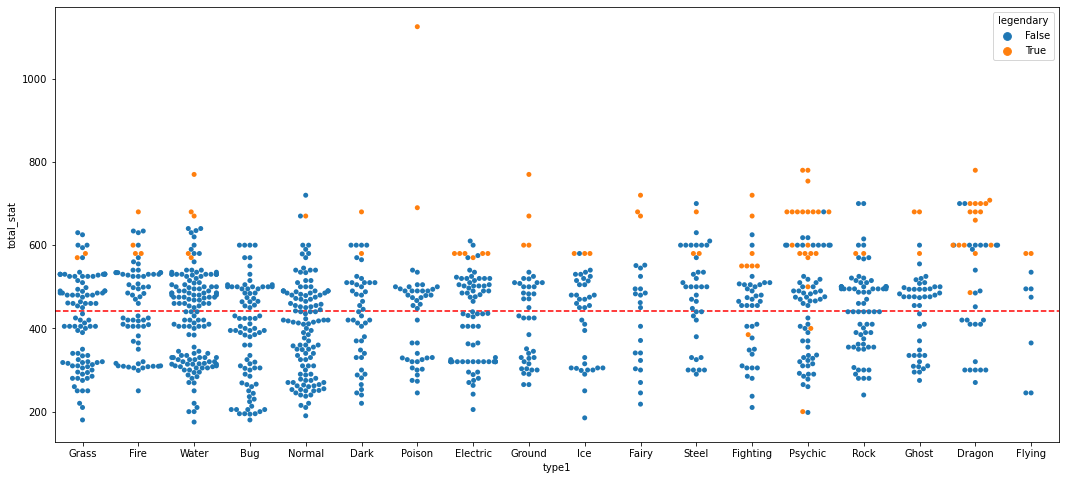

In [235]:
fig, ax = plt.subplots(figsize=(18,8))
# Swarmplot
sns.swarmplot(x='type1',y='total_stat',data=df2,hue='legendary') # this plot shows the points belonging to individual pokemons
plt.axhline(df2['total_stat'].mean(),color='red',linestyle='dashed')
plt.show()

C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


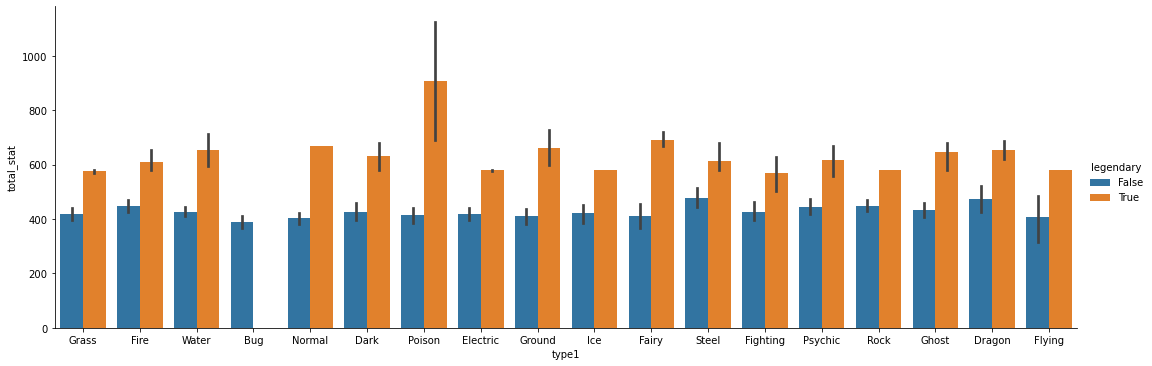

In [278]:
# Factorplot
sns.factorplot(x='type1',y='total_stat',hue='legendary',data=df2,kind='bar',aspect=3,size=5)

### Visualisation sur les types de pokemon au fil des genenerations

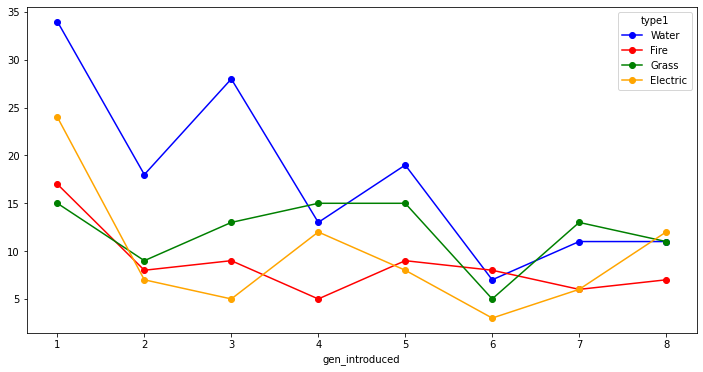

In [27]:
# Il y a une tentative d'equilibrage de la representation des types au fil des generations
a=df2.groupby(['gen_introduced','type1']).count().reset_index()
a=a[['gen_introduced','type1','total_stat']]
a=a.pivot('gen_introduced','type1','total_stat')
a[['Water','Fire','Grass','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Text(0.5, 1.0, 'Pokemon / Type1')

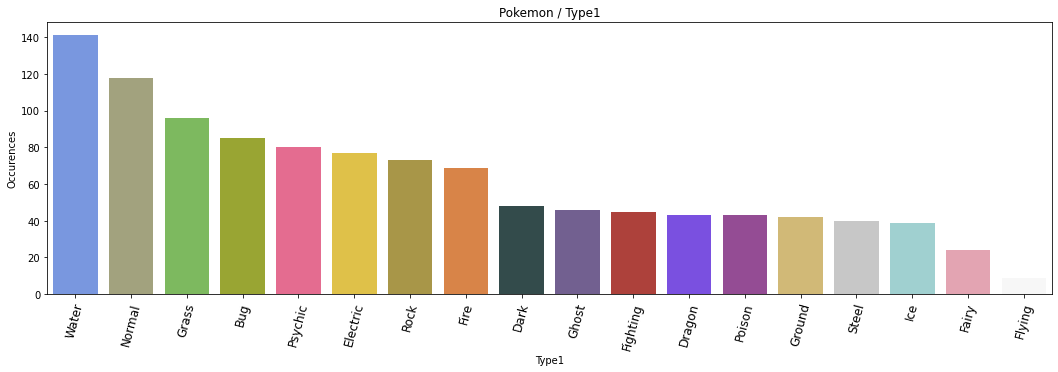

In [440]:
# On en est où en Gen8 sur la representation des types ?
fig, ax = plt.subplots(figsize=(18,5))
type1 = pd.value_counts(df2['type1'])
colortype =  [
    '#6890F0',  # Water
    '#A8A878',  # Normal
    '#78C850',  # Grass
    '#A8B820',  # Bug
    '#F85888',  # Psychic
    '#F8D030',  # Electric
    '#B8A038',  # Rock
    '#F08030',  # Fire
    '#2F4F4F',  # Dark
    '#705898',  # Ghost
    '#C03028',  # Fighting
    '#7038F8',  # Dragon
    '#A040A0',  # Poison
    '#E0C068',  # Ground
    '#C7C7C7',  # Steel
    '#98D8D8',  # Ice
    '#EE99AC',  # Fairy
    '#F7F7F7'   # Flying          
            ]
bar = sns.barplot(x=type1.index,y=type1,data=df2,palette=colortype,ax=ax)
bar.set_xticklabels(bar.get_xticklabels(),rotation=75,fontsize=12)
bar.set(xlabel='Type1',ylabel='Occurences')
bar.set_title('Pokemon / Type1')

In [33]:
df2.reset_index()
df2.set_index('name')

# Chxoi de nos deux pokemon selon leur index dans df2
pok1= df2.loc[df2['name'] == 'Pikachu']
pok2= df2.loc[df2['name'] == 'Raichu']
pok2


name  hp  attack  defense  special_attack  special_defense  speed  \
52  Raichu  60      90       55              90               80    110   

    gen_introduced  legendary     type1     type2  total_stat  
52               1      False  Electric  Electric         485

In [26]:
df.head(20)

name  pokedex_number                  abilities        typing  \
0          Bulbasaur               1       Overgrow~Chlorophyll  Grass~Poison   
1            Ivysaur               2       Overgrow~Chlorophyll  Grass~Poison   
2           Venusaur               3       Overgrow~Chlorophyll  Grass~Poison   
3      Venusaur Gmax               3       Overgrow~Chlorophyll  Grass~Poison   
4      Venusaur Mega               3                  Thick Fat  Grass~Poison   
5         Charmander               4          Blaze~Solar Power          Fire   
6         Charmeleon               5          Blaze~Solar Power          Fire   
7          Charizard               6          Blaze~Solar Power   Fire~Flying   
8     Charizard Gmax               6          Blaze~Solar Power   Fire~Flying   
9   Charizard Mega X               6                Tough Claws   Fire~Dragon   
10  Charizard Mega Y               6                    Drought   Fire~Flying   
11          Squirtle               7          Torrent~Rain Dish         Water   
12         Wartortle               8          Torrent~Rain Dish         Water   
13         Blastoise               9          Torrent~Rain Dish         Water   
14    Blastoise Gmax               9          Torrent~Rain Dish         Water   
15    Blastoise Mega               9              Mega Launcher         Water   
16          Caterpie              10       Shield Dust~Run Away           Bug   
17           Metapod              11                  Shed Skin           Bug   
18        Butterfree              12  Compound Eyes~Tinted Lens    Bug~Flying   
19   Butterfree Gmax              12  Compound Eyes~Tinted Lens    Bug~Flying   

    hp  attack  defense  special_attack  special_defense  speed  ...  \
0   45      49       49              65               65     45  ...   
1   60      62       63              80               80     60  ...   
2   80      82       83             100              100     80  ...   
3   80      82       83             100              100     80  ...   
4   80     100      123             122              120     80  ...   
5   39      52       43              60               50     65  ...   
6   58      64       58              80               65     80  ...   
7   78      84       78             109               85    100  ...   
8   78      84       78             109               85    100  ...   
9   78     130      111             130               85    100  ...   
10  78     104       78             159              115    100  ...   
11  44      48       65              50               64     43  ...   
12  59      63       80              65               80     58  ...   
13  79      83      100              85              105     78  ...   
14  79      83      100              85              105     78  ...   
15  79     103      120             135              115     78  ...   
16  45      30       35              20               20     45  ...   
17  50      20       55              25               25     30  ...   
18  60      45       50              90               80     70  ...   
19  60      45       50              90               80     70  ...   

    ground_attack_effectiveness  fly_attack_effectiveness  \
0                           1.0                       2.0   
1                           1.0                       2.0   
2                           1.0                       2.0   
3                           1.0                       2.0   
4                           1.0                       2.0   
5                           2.0                       1.0   
6                           2.0                       1.0   
7                           0.0                       1.0   
8                           0.0                       1.0   
9                           2.0                       1.0   
10                          0.0                       1.0   
11                          1.0                       1.0   
12      

### Visualisation pour comparer le potentiel de deux pokemon

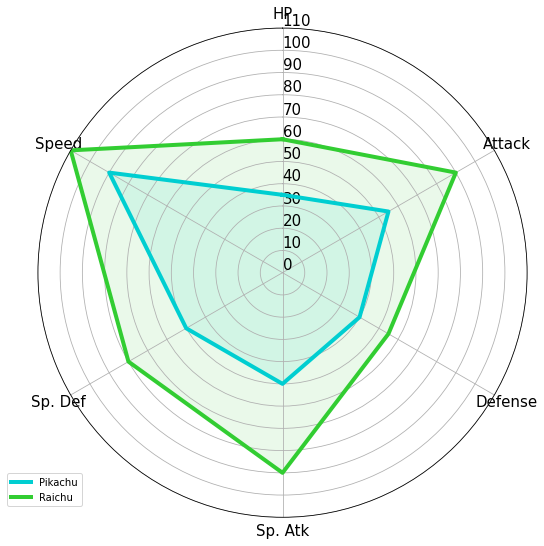

In [34]:
df2.reset_index()
df2.set_index('name')

# Chxoi de nos deux pokemon selon leur index dans df2
pok1= df2.iloc[37]
pok2= df2.iloc[52]

# Figure
fig = plt.figure(figsize=(9,9))
color1='darkturquoise'
color2='limegreen'

# Data
dfcomp = pd.DataFrame({
'group': [pok1['name'],pok2['name']],
'HP': [pok1["hp"], pok2["hp"]],
'Attack': [pok1["attack"], pok2["attack"]],
'Defense': [pok1["defense"], pok2["defense"]],
'Sp. Atk': [pok1["special_attack"], pok2["special_attack"]],
'Sp. Def': [pok1["special_defense"], pok2["special_defense"]],
'Speed': [pok1["speed"], pok2["speed"]]
})

# Maximum des stats pour l'échelle du radar chart
maximum=max([pok1["hp"], pok2["hp"], pok1["attack"], pok2["attack"],pok1["defense"], pok2["defense"],pok1["special_attack"], pok2["special_attack"],
pok1["special_defense"], pok2["special_defense"],pok1["speed"], pok2["speed"]])
 
# 1: Background
 
# Variables
categories=['HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed']
N = len(categories)
aa=[]
aaa=[]
for i in range(maximum):
    aa.append(i*10)
    aaa.append(str(i*10))
    
# Angles entre axe/stats sur le radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialisation
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Axe = variable + labeling
plt.xticks(angles[:-1], categories,size=15,color="black")
ax.set_rlabel_position(0)
plt.yticks(aa, aaa, color="black", size=15)
plt.ylim(0,maximum)

#  2: Ajout des plots
 
# Pokemon 1
values=dfcomp.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=4, linestyle='solid', label=pok1['name'],color=color1)
ax.fill(angles, values, color1, alpha=0.1)
 
# Pokemon 2
values=dfcomp.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=4, linestyle='solid', label=pok2['name'],color=color2)
ax.fill(angles, values, color2, alpha=0.1)
 
# Legende
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))